In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# for nice plots
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
plt.rc(rc)

# Import the utilities file
import pboc_utilities as pboc

In this notebook, we'll explore the physics of ion channels using concepts from statistical mechanics. 

An ion channel can be thought of as a two-state system: the channel is either open or closed. When open, current can flow through the channel (ions can cross the membrane). When closed, no current flows (ions are blocked from crossing the membrane). The current across a membrane is something that can be measured. So if a scientist measures the current across a membrane containing a single channel, than the current as a function of time will reflect the probability that the channel is open or closed. 

![(a) Time trace of current. (b) Cartoon of closed and open states and weights for probability of being opened or closed as determined from the Boltzmann distribution.](IonChannel_Fig6.3.png "Open and closed states")
(a) Time trace of current. (b) Cartoon of closed and open states and weights for probability of being opened or closed as determined from the Boltzmann distribution.

What we will do in this computational excersize is first read in the current vs time data (current will be in pA and time in ms). From this, we will determine the fraction of time the channel is open and the fraction of time it is close. (Note that this is very similar to the "Excursion" in section 6.7 where the fraction of time an RNA molecule was folded/unfolded was determined based off of extension vs time plots.)

In [2]:
'''
In section 6.7, you saw that the fraction of time that the RNA molecule was folded or unfolded
was influenced (or biased) by the force that was pulling on it. 

Here, we will bias the channel by applying a voltage across it. The voltages that we apply 
are listed below in the variable `voltages'.
'''

#The voltages, in units of mV:
voltages = np.array([-135., -125, -115, -105, -95, -85, -75, -65, -55])

In [9]:
'''
Now, let's read in the current vs time data. 

This is in an Excel file with 10 columns. The first column is time. The other columns are 
the current (in mA) for each of the different voltages. 
'''

data = np.loadtxt("Keller1986Interpolated_CSV.csv", skiprows=1, delimiter=',')
print("The dimensions of the data: (%i,%i)" % data.shape)

#The first column is the time data. So:
time = data[:,0]

The dimensions of the data: (18424,10)


Text(0,0.5,'Current (mA)')

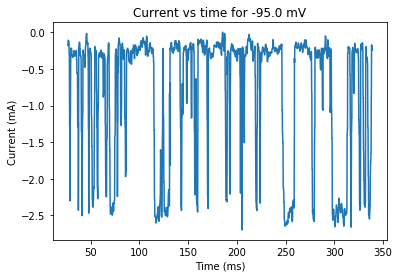

In [11]:
fig = plt.figure()
plt.plot(time, data[:,4])
plt.title("Current vs time for %.1f mV" % voltages[4])
plt.xlabel("Time (ms)")
plt.ylabel("Current (pA)")

Note that there are clearly two states. The current is either near -0.25 pA or around -2.5 pA. This is again like Section 6.7 where the RNA molecule's length was roughly either one of two states (folded or unfolded). Here, we have that the channel is either closed (with a near-zero current) or open. 

To more clearly differentiate these two states, let's plot a histogram.

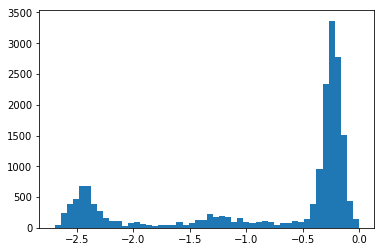

In [18]:
plt.figure()
n,bins,ptchs = plt.hist(data[:,4], bins=50)

Let's establish a threshold. If the current is below this value, we'll say the channel is open (note that the current is negative). And if it is above it, the channel will be considered closed. 

In [19]:
'''
A straightforward way of finding that threshold will be to just go half
way between the max and min currents.
'''
threshold = ((data[:,4].max() - data[:,4].min())/2.0) + data[:,4].min()

Text(0,0.5,'Current (pA)')

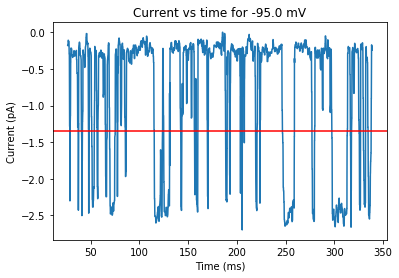

In [22]:
'''
Plot of current vs time with the threshold indicated.
'''

fig = plt.figure()
plt.plot(time, data[:,4])
plt.title("Current vs time for %.1f mV" % voltages[4])
plt.axhline(threshold, c='r')
plt.xlabel("Time (ms)")
plt.ylabel("Current (pA)")

Now, let's figure out what fraction of time is spent open vs closed. 

In [24]:
time_open = np.sum(data[:,4]<=threshold)*1.0   #multiplying by 1.0 just makes the number a floating point (rather than int)
time_closed = np.sum(data[:,4]>threshold)*1.0

prob_open = time_open / (time_open + time_closed)
prob_closed = time_closed / (time_open + time_closed)

print("The probability of the channel being open is %.3f and of being closed %.3f." % (prob_open, prob_closed))

The probability of the channel being open is 0.243 and of being closed 0.757.


If you want, you can see if varying the threshold changes these probabilities very much. Try adjusting the threshold by 10% or so in either direction. 

Now, we are ready to do this for all nine voltages. 

In [27]:
pOpen = np.zeros((9)) #initializing an array to hold our probabilities for being open
pClosed = np.zeros_like(pOpen) #same for probabilities of closed

for i in range(9):
    #Using "i+1" because the first column is the time and we want the data of the current
    threshold = ((data[:,i+1].max() - data[:,i+1].min())/2.0) + data[:,i+1].min()
    time_open = np.sum(data[:,i+1]<=threshold)*1.0  
    time_closed = np.sum(data[:,i+1]>threshold)*1.0
    pOpen[i] = time_open / (time_open + time_closed)
    pClosed[i] = time_closed / (time_open + time_closed)

Now we plot!

Text(0,0.5,'Probability of open channel')

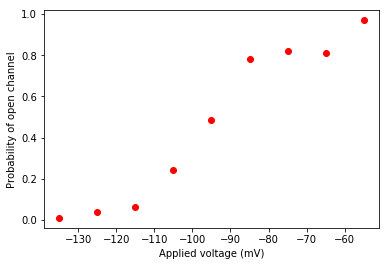

In [29]:
plt.figure()
plt.plot(voltages, pOpen, 'ro')
plt.xlabel("Applied voltage (mV)")
plt.ylabel("Probability of open channel")

For these voltages, let's figure out the the different in energy between the open and closed states. 

If we define $$\Delta E = \varepsilon_{open} - \varepsilon_{closed}$$ then (as shown in Equn 6.24 and 6.25) the probability of being in the open state is: $$P_{open} = \frac{1}{1+e^{\Delta E / k_BT}}$$. 

This model of a two state system was also used in Section 6.7. See the figure below. 
![Fig. 6.10b](Section6.7Figure6.10.png "Fraction folded versus force")

### Your Turn

Find the values of $\varepsilon_{open} - \varepsilon_{closed}$ for the different applied voltages. 